# Statistical testing

## Definitions

- **Sample** $X_N \sim P$, where $P$ is some distribution;
- $H_0$, $H_1$ - main and alternative **hypotheses**;
- **Statistic** $T(X_N)\sim D$ sampling function, where $D$ is some distribution;
- **Significance level** $\alpha$ - if we reproduce the entire experiment over and over again, $\alpha$ defines in what proportion of the reproductions we allow for the erroneous rejection of the null hypothesis.;
- **Realisation of the statistics** for the sample under consideration $t=T(X_N)$;
- **p_value** achievable level of significance $p(X_N)=P(T \geq t|H_0)$ - is the probability with which we hit the value of the statistic $t$ and more extreme in assuption that $H_0$ is right. **Note** $T \geq t$ does not necessarily mean that $T$ is greater than or equal to $t$, it simply means that it is more different from the expected value at $H_0$ fidelity. So if $P(X_N) \leq \alpha$ means that we got less possible event that we able to accept and we have to reject $H_0$.

## Example

The coin has been flipped 100 times. 45 eagles were received. It is required to confirm that the coin is correct given the probability of error in 5 cases out of 100.

Let's $p$ - the probability of an eagle on the coin.

So 

- $H_0$ - we have normal coin, formally $p=0.5$;
- $H_1$ - we have broken coin, formally $p \neq 0.5$.

Our $X_N = [x_1,x_2,x_3, ..., x_{100}]$. 

Where:

$$x_i=\begin{cases}
1,\text{if there's an eagle on the coin for i-th throw}; \\
0,\text{if the coin is tails for i-th throw}.
\end{cases}$$

And each $x_i$ follows a Bernouli distribution with parameter $p$.

Our statistics is:

$$T(X_N)=\sum_{i=1}^{100} x_i.$$

And it distributed according binomial with parameters $p$ and $100$ ($B(p,100)$).

The particular realisation of this experiment is that $t=45$. 

In fact, $H_0$ states that our statistics is distributed according to the distribution with the parameter $p=0.5$ and $H_1$ that our statistics is distributed according to distribution with some other value of the parameter. So if we assume that $H_0$ is true, then it turns out that $t\sim B(0.5, 100)$.

Density function for $B(0.5,100)$ is plotted below. So the most possible number is somewhere around 50.

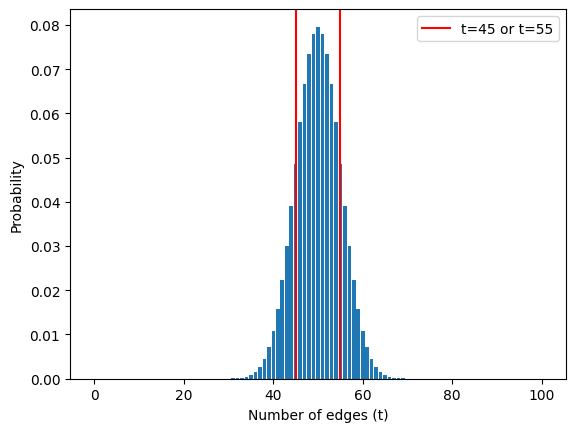

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

N = 100
n_pos = 45
F_H0 = binom(p=0.5, n=N)
N_pos_available = np.arange(0, 101, 1)
probabilities = F_H0.pmf(N_pos_available)

plt.bar(N_pos_available, probabilities)
plt.axvline(45, color="red");plt.axvline(55, color="red")
plt.xlabel("Number of edges (t)")
plt.ylabel("Probability")
plt.legend(["t=45 or t=55"])
plt.show()

Is $t=45$ a possible value for these conditions? Actually, we didn't really care that $t$ took a value smaller than the most expected, we only cared that it shouldn't be too different from the most expected $50$. So the correct question here is how likely are the values 45 and less or 55 and more?

We can express these probability:

$$P(T\leq 45|H_0) + P(T \geq 55 | H_0)=2P(T\leq 45|H_0)=2F_{B(0.5, 100)}(45)$$.

Where $F_{B(0.5,100)}(x)$ - cumulative distribution function of the binomial distribution corresponding to $H_0$. 

So we expressed the probability that this or an even less likely event could have occurred. Question changes again: Are we happy with this probability?

For this case it took value:

In [21]:
2*binom(p=0.5, n=N).cdf(45)

0.36820161732669576

This means that in ~37 cases out of 100, it's OK to have a deviation from the most likely value equal to or greater than 45.

We can compute such range of values of $t$ that we need to understand as possiible. We need to choose significance level - the proportion of cases we are willing to accept as probable for the null hypothesis. So if the event can occur 5 times out of 100, that means we have to choose a significance level of $5\%$. 

As a result, we need to construct such an interval in which the measured value of the metric in question appears in $95\%$ of the cases. For this case such interval can be written as $[F^{-1}_{B(0.5,100)}(0.025); F^{-1}_{B(0.5,100)}(0.975)]$.

Where $F^{-1}_{B(0.5,100)}(p)$ - inverse cumulative distribution for distribution under consideration. So for our case it can be computed with the following code:

In [26]:
print(
    "range from",
    binom(p=0.5, n=N).ppf(0.025), "to", 
    binom(p=0.5, n=N).ppf(0.975)
)

range from 40.0 to 60.0


So any case where we have less than 40 and more than 60 edges in 100 throws is so unlikely that we can't believe it's random and have to reject $H_0$.